In [1]:
# import dependencies
import pandas as pd
import numpy as np  

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV      # used to find hyperparameters for XGBoost

from datetime import datetime

### **Import and make a copy of CSV**

In [2]:
# Filepath
price_filepath =  "../../../data/processed/listings_feature_matrix_scaled_price.csv"
occupancy_filepath =  "../../../data/processed/listings_feature_matrix_scaled_occupancy.csv"

# Read CSV
price_csv = pd.read_csv(price_filepath)
occupancy_csv = pd.read_csv(occupancy_filepath) 
occupancy_csv = pd.read_csv(occupancy_filepath) 

# copy and remove other target columns
price_df = price_csv.drop(columns=['id', 'estimated_occupancy_l365d', 'estimated_revenue_l365d']).copy()
revenue_df = price_csv.drop(columns=['id', 'price', 'estimated_occupancy_l365d']).copy()
occupancy_df = occupancy_csv.drop(columns=['id', 'estimated_revenue_l365d']).copy()

In [3]:
# # Check if each feature matrix is correct
print("Price Feature Matrix")
display(price_df)
print("Revenue Feature Matrix")
display(revenue_df)
print("Occupancy Feature Matrix")
display(occupancy_df)


Price Feature Matrix


,latitude,longitude,downtown_distance,neighbourhood_freq,property_type_freq,property_type_neigh_freq,accommodates,bedrooms,beds,bathrooms_count,...,amenities_Single_level_home,amenities_Smart_lock,amenities_Smoke_alarm,amenities_Sound_system,amenities_Stove,amenities_TV,amenities_Toaster,amenities_Washer,amenities_Wifi,amenities_Wine_glasses
0,-0.249773,0.024375,-0.621581,-0.197747,-0.670719,-0.308531,-0.160269,-0.491918,-0.697614,-0.473808,...,0,0,0,0,0,1,0,1,1,0
1,-0.554987,-0.039965,-0.855404,-0.308232,0.096774,-0.361087,-0.644755,-0.491918,-0.697614,-0.473808,...,0,0,1,0,1,0,1,0,1,0
2,-0.693914,-0.057328,-0.930511,-0.308232,0.096774,-0.361087,-0.160269,-0.491918,-0.697614,-0.473808,...,0,0,1,1,0,1,1,1,0,1
3,-1.429419,-1.947689,0.937046,-0.599654,0.096774,-0.564741,-0.644755,-0.491918,0.179697,-0.473808,...,1,0,1,0,1,0,1,0,1,1
4,1.050319,-1.141370,0.944992,-0.530801,-1.958153,-0.538463,1.293188,0.619696,1.057008,2.084064,...,0,0,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,-0.754676,0.053104,-1.049788,2.111215,0.096774,1.902105,0.324217,-0.491918,0.179697,-0.473808,...,1,0,1,0,1,1,1,1,1,0
9609,-0.678626,0.113668,-1.019338,2.111215,0.985043,-0.515470,1.293188,0.619696,1.057008,-0.473808,...,0,0,1,0,1,1,0,1,1,1
9610,-0.603807,0.002563,-0.915060,-0.308232,0.985043,-0.292107,-0.644755,-0.491918,-0.697614,-0.473808,...,0,0,1,0,1,0,0,1,1,0
9611,0.436208,1.699811,0.741710,-0.577237,0.985043,-0.482622,-0.644755,-0.491918,-0.697614,1.231440,...,0,0,1,0,0,1,1,0,1,0


Revenue Feature Matrix


,latitude,longitude,downtown_distance,neighbourhood_freq,property_type_freq,property_type_neigh_freq,accommodates,bedrooms,beds,bathrooms_count,...,amenities_Single_level_home,amenities_Smart_lock,amenities_Smoke_alarm,amenities_Sound_system,amenities_Stove,amenities_TV,amenities_Toaster,amenities_Washer,amenities_Wifi,amenities_Wine_glasses
0,-0.249773,0.024375,-0.621581,-0.197747,-0.670719,-0.308531,-0.160269,-0.491918,-0.697614,-0.473808,...,0,0,0,0,0,1,0,1,1,0
1,-0.554987,-0.039965,-0.855404,-0.308232,0.096774,-0.361087,-0.644755,-0.491918,-0.697614,-0.473808,...,0,0,1,0,1,0,1,0,1,0
2,-0.693914,-0.057328,-0.930511,-0.308232,0.096774,-0.361087,-0.160269,-0.491918,-0.697614,-0.473808,...,0,0,1,1,0,1,1,1,0,1
3,-1.429419,-1.947689,0.937046,-0.599654,0.096774,-0.564741,-0.644755,-0.491918,0.179697,-0.473808,...,1,0,1,0,1,0,1,0,1,1
4,1.050319,-1.141370,0.944992,-0.530801,-1.958153,-0.538463,1.293188,0.619696,1.057008,2.084064,...,0,0,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,-0.754676,0.053104,-1.049788,2.111215,0.096774,1.902105,0.324217,-0.491918,0.179697,-0.473808,...,1,0,1,0,1,1,1,1,1,0
9609,-0.678626,0.113668,-1.019338,2.111215,0.985043,-0.515470,1.293188,0.619696,1.057008,-0.473808,...,0,0,1,0,1,1,0,1,1,1
9610,-0.603807,0.002563,-0.915060,-0.308232,0.985043,-0.292107,-0.644755,-0.491918,-0.697614,-0.473808,...,0,0,1,0,1,0,0,1,1,0
9611,0.436208,1.699811,0.741710,-0.577237,0.985043,-0.482622,-0.644755,-0.491918,-0.697614,1.231440,...,0,0,1,0,0,1,1,0,1,0


Occupancy Feature Matrix


,latitude,longitude,downtown_distance,neighbourhood_freq,property_type_freq,property_type_neigh_freq,accommodates,bedrooms,beds,bathrooms_count,...,amenities_Single_level_home,amenities_Smart_lock,amenities_Smoke_alarm,amenities_Sound_system,amenities_Stove,amenities_TV,amenities_Toaster,amenities_Washer,amenities_Wifi,amenities_Wine_glasses
0,-0.249773,0.024375,-0.621581,-0.197747,-0.670719,-0.308531,-0.160269,-0.491918,-0.697614,-0.473808,...,0,0,0,0,0,1,0,1,1,0
1,-0.554987,-0.039965,-0.855404,-0.308232,0.096774,-0.361087,-0.644755,-0.491918,-0.697614,-0.473808,...,0,0,1,0,1,0,1,0,1,0
2,-0.693914,-0.057328,-0.930511,-0.308232,0.096774,-0.361087,-0.160269,-0.491918,-0.697614,-0.473808,...,0,0,1,1,0,1,1,1,0,1
3,-1.429419,-1.947689,0.937046,-0.599654,0.096774,-0.564741,-0.644755,-0.491918,0.179697,-0.473808,...,1,0,1,0,1,0,1,0,1,1
4,1.050319,-1.141370,0.944992,-0.530801,-1.958153,-0.538463,1.293188,0.619696,1.057008,2.084064,...,0,0,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,-0.754676,0.053104,-1.049788,2.111215,0.096774,1.902105,0.324217,-0.491918,0.179697,-0.473808,...,1,0,1,0,1,1,1,1,1,0
9609,-0.678626,0.113668,-1.019338,2.111215,0.985043,-0.515470,1.293188,0.619696,1.057008,-0.473808,...,0,0,1,0,1,1,0,1,1,1
9610,-0.603807,0.002563,-0.915060,-0.308232,0.985043,-0.292107,-0.644755,-0.491918,-0.697614,-0.473808,...,0,0,1,0,1,0,0,1,1,0
9611,0.436208,1.699811,0.741710,-0.577237,0.985043,-0.482622,-0.644755,-0.491918,-0.697614,1.231440,...,0,0,1,0,0,1,1,0,1,0


### **XGBoost Exploration functions**

In [4]:
# Function to run and train XGBoost model for each target value
def train_xgboost_model(df, target, custom_params=None):
    X = df.drop(columns=[target])
    y = df[target]
    
    # Apply log transform on target dataframe
    y_log = np.log1p(y)
    
    # train_test_split dataframes
    X_train, X_test, y_train, y_test = train_test_split(X, y_log, random_state=42)

    # build XGB regression model
    if custom_params:
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            **custom_params
        )
    else:
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=500,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
    
    # Fit the model with an early stop parameter
    model.fit(X_train, y_train)
    
    # predicting models and calculating r squared and rmse scores
    predictions = model.predict(X_test)
    r2 = round((r2_score(y_test, predictions)*100), 2)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    
    # print scores
    print(f"R2 score: {r2}%")          
    print(f"RMSE score: {round(rmse, 2)}")      # depicts the average error of the predictions but in the target column's values
    
    return model, X_train, X_test, y_train, y_test, r2


### **Drop Uninfluential Columns**
Droping columns based on threshold in Shap Explainer Analysis

though dropping didnt help, scores mainly improved following the added feature engineering of 'bed_bath_interaction', 'log_beds', 'log_reviews_ly'

In [5]:
# Columns to drop
useless_columns_1 = []

#### Drop Uninfluential Columns

In [6]:
# Drop Columns in the lists above
price_df = price_df.drop(columns=useless_columns_1)
revenue_df = revenue_df.drop(columns=useless_columns_1)
occupancy_df = occupancy_df.drop(columns=useless_columns_1)

### **Train each model**

In [7]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

In [8]:
# best params for price
best_price_params = {'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.5}

In [9]:
# Price target model
price_model, price_X_train, price_X_test, price_y_train, price_y_test, price_r2 = train_xgboost_model(price_df, target='price', custom_params=best_price_params)

# Filepath
price_filename = f'../../../results/price_XGBmodel_{timestamp}({price_r2}).json'

# Save the model
price_model.save_model(price_filename)

R2 score: 73.25%
RMSE score: 0.35


In [10]:
# best params for revenue
best_revenue_params = {'subsample': 0.5, 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 1}

In [11]:
# Revenue target model
revenue_model, revenue_X_train, revenue_X_test, revenue_y_train, revenue_y_test, revenue_r2 = train_xgboost_model(revenue_df, target='estimated_revenue_l365d', custom_params=best_revenue_params)

# Filepath
revenue_filename = f'../../../results/revenue_XGBmodel_{timestamp}({revenue_r2}).json'

# Save the model
price_model.save_model(revenue_filename)

R2 score: 72.74%
RMSE score: 0.58


In [12]:
# best params for occupancy
best_occupancy_params = {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1}

In [13]:
# Occupancy model
occupancy_model, occupancy_X_train, occupancy_X_test, occupancy_y_train, occupancy_y_test, occupancy_r2 = train_xgboost_model(occupancy_df, target='estimated_occupancy_l365d', custom_params=best_occupancy_params)

# Filepath
occupancy_filename = f'../../../results/occupancy_XGBmodel_{timestamp}({occupancy_r2}).json'

# Save the model
occupancy_model.save_model(occupancy_filename)

R2 score: 65.47%
RMSE score: 0.52


### **PCA Analysis**

Despite attempting every number of components possible, no higher values for r squared were found

In [14]:
# PCA Analysis Function
def find_best_pca_components(X_train, X_test, y_train, y_test, model_params, max_component):
    results = []
    
    max_components = max_component or X_train.shape[1]
    
    for n_components in range(200, max_components + 1):
        # Step 2: Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Step 3: Train Model
        model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **model_params)
        model.fit(X_train_pca, y_train)
        
        # Step 4: Predict
        preds = model.predict(X_test_pca)
        r2 = r2_score(y_test, preds)
        
        results.append((n_components, r2))
        
    # Turn into DataFrame for easier view
    results_df = pd.DataFrame(results, columns=["n_components", "r2_score"])
    
    return results_df

In [15]:
# Find best PCA components for Price
price_pca_results = find_best_pca_components(price_X_train, price_X_test, price_y_train, price_y_test, best_price_params, 285)

# View Results
price_pca_results.sort_values(by='r2_score', ascending=False)

,n_components,r2_score
4,204,0.694164
3,203,0.693779
58,258,0.693126
14,214,0.692851
2,202,0.692702
...,...,...
27,227,0.687331
70,270,0.687106
29,229,0.686662
42,242,0.685971


In [16]:
# Find best PCA components for Price
revenue_pca_results = find_best_pca_components(revenue_X_train, revenue_X_test, revenue_y_train, revenue_y_test, best_revenue_params, 285)

# View Results
revenue_pca_results.sort_values(by='r2_score', ascending=False)

,n_components,r2_score
6,206,0.675251
13,213,0.674816
71,271,0.674568
23,223,0.674562
61,261,0.674332
...,...,...
16,216,0.671826
29,229,0.671782
39,239,0.671730
41,241,0.671692


In [17]:
# Find best PCA components for Price
occupancy_pca_results = find_best_pca_components(occupancy_X_train, occupancy_X_test, occupancy_y_train, occupancy_y_test, best_occupancy_params, 285)

# View Results
occupancy_pca_results.sort_values(by='r2_score', ascending=False)

,n_components,r2_score
72,272,0.569343
56,256,0.569152
69,269,0.569086
48,248,0.568956
32,232,0.568532
...,...,...
20,220,0.565374
17,217,0.565330
7,207,0.565167
84,284,0.565139


### **Hyperparameter Search**

In [18]:
# Define parameters options for model
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [3, 4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9, 1],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 5, 10, 20]
}

In [19]:
# Set up RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_grid,
    n_iter=25,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

In [20]:
# fit the search to the price column
# search.fit(price_X_train, np.log1p(price_df['price'].iloc[price_X_train.index]))

# fit the search to the revenue column
# search.fit(revenue_X_train, np.log1p(revenue_df['estimated_revenue_l365d'].iloc[revenue_X_train.index]))

# fit the search to the occupancy column
search.fit(occupancy_X_train, np.log1p(occupancy_df['estimated_occupancy_l365d'].iloc[occupancy_X_train.index]))

print(search.best_params_)

{'subsample': 0.7, 'reg_lambda': 5, 'reg_alpha': 0.01, 'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 1}


### **Conduct a Shap Feature Importance on each model**

In [21]:
# Import Dependencies
import shap
import matplotlib.pyplot as plt

### Price Model

In [22]:
# Designate Shap explainer
explainer = shap.TreeExplainer(price_model, price_X_train)

# Calculate Shap Values
print("Starting SHAP...")
shap_price_values = explainer(price_X_test)
print("Done computing SHAP!")


Starting SHAP...


100%|===================| 2397/2404 [04:13<00:00]        

Done computing SHAP!


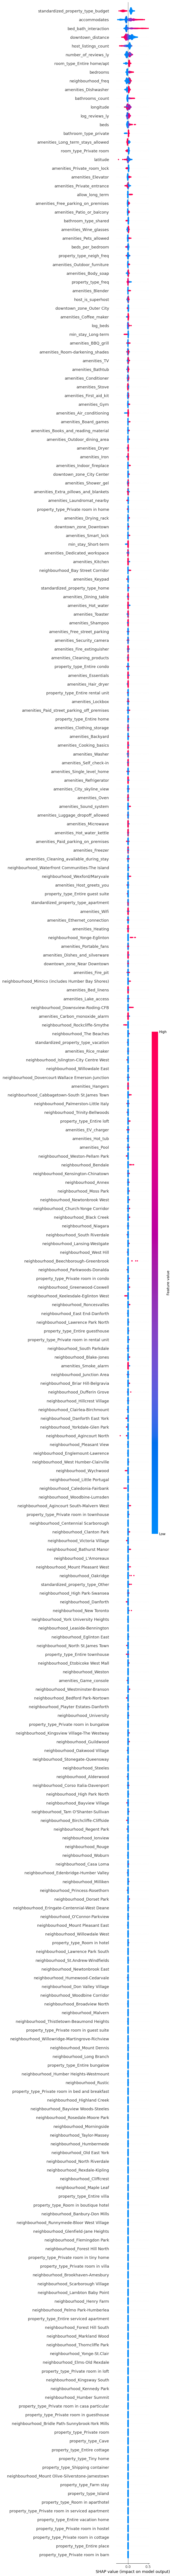

In [23]:
# Make a summary plot of Feature Importance
shap.summary_plot(shap_price_values, price_X_test, max_display=300)

In [24]:
# Compute Mean Absolute Shap Values
shap_importance_df = pd.DataFrame({
    'feature': price_X_train.columns,
    'mean_abs_shap': np.abs(shap_price_values.values).mean(axis=0)
})

# Set Cutoff Threshold
threshold = 0.0005

# save low impact features to list
low_impact_features = shap_importance_df[shap_importance_df['mean_abs_shap'] < threshold]['feature'].tolist()

low_impact_features

['neighbourhood_Agincourt North',
 'neighbourhood_Agincourt South-Malvern West',
 'neighbourhood_Alderwood',
 'neighbourhood_Annex',
 'neighbourhood_Banbury-Don Mills',
 'neighbourhood_Bathurst Manor',
 'neighbourhood_Bayview Village',
 'neighbourhood_Bayview Woods-Steeles',
 'neighbourhood_Bedford Park-Nortown',
 'neighbourhood_Beechborough-Greenbrook',
 'neighbourhood_Bendale',
 'neighbourhood_Birchcliffe-Cliffside',
 'neighbourhood_Black Creek',
 'neighbourhood_Blake-Jones',
 'neighbourhood_Briar Hill-Belgravia',
 'neighbourhood_Bridle Path-Sunnybrook-York Mills',
 'neighbourhood_Broadview North',
 'neighbourhood_Brookhaven-Amesbury',
 'neighbourhood_Caledonia-Fairbank',
 'neighbourhood_Casa Loma',
 'neighbourhood_Centennial Scarborough',
 'neighbourhood_Church-Yonge Corridor',
 'neighbourhood_Clairlea-Birchmount',
 'neighbourhood_Clanton Park',
 'neighbourhood_Cliffcrest',
 'neighbourhood_Corso Italia-Davenport',
 'neighbourhood_Danforth',
 'neighbourhood_Danforth East York',
 'nei